# 자연어 처리 KoNLPy-Kkma
## 강아지 산책 매너

### 1. 크롤링 후 전처리
#### 크롤링 한 파일 읽어오기

In [1]:
import sys
import csv

csv.field_size_limit(sys.maxsize)
data = list()

f = open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/naverCafe_dogwalkmanner.csv",'r')
rea = csv.reader(f)
f

<_io.TextIOWrapper name='/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/naverCafe_dogwalkmanner.csv' mode='r' encoding='UTF-8'>

#### 한 단위 별로 묶음 
- 글제목
- 글
- 댓글

In [2]:
for row in rea:
    data.append((row[0],row[1],row[2]))

In [3]:
print(data[0][1])

요즘은 강아지 산책 매너가 많이 좋아져서
목줄 대부분 하고 산책하죠
큰 변화 같습니다
그런데 자전거 도로 산책하다 보면
목줄이 너무 길어서 지나가는사람이나 자전거와 트러블 나는 경우들이 보이더라고요
강아지나 산책객들이나  자전거탄 사람들에게 매우 위험한 일이죠
인도 산책길에서 사람 지나가더라도 길이 2미터이상  늘려잡고 가는 사람들이 많은데
제발 사람 지나가면 줄 1미터 이내로 짧게 잡아주세요
개는 사람이 아니기 떄문에 어떤 돌발행동 할줄 모릅니다
예전보다는 많이 상황이 좋아졌지만
산책할때 사람없을땐 목줄 길게 메더라도 사람 지나가면 짧게 해주세요


#### 한글 제외 모두 삭제

In [4]:
import re

texts = list()

for i in range(0,len(data)) :
    for j in range(0,2):
        text = re.compile('[^ 가-힣]+').sub("",data[i][j])
        text = text.rstrip()
        text = text.lstrip()
        texts.append(text)
print(texts)

['강아지 산책 매너중 끈 짧게 잡기', '요즘은 강아지 산책 매너가 많이 좋아져서목줄 대부분 하고 산책하죠큰 변화 같습니다그런데 자전거 도로 산책하다 보면목줄이 너무 길어서 지나가는사람이나 자전거와 트러블 나는 경우들이 보이더라고요강아지나 산책객들이나  자전거탄 사람들에게 매우 위험한 일이죠인도 산책길에서 사람 지나가더라도 길이 미터이상  늘려잡고 가는 사람들이 많은데제발 사람 지나가면 줄 미터 이내로 짧게 잡아주세요개는 사람이 아니기 떄문에 어떤 돌발행동 할줄 모릅니다예전보다는 많이 상황이 좋아졌지만산책할때 사람없을땐 목줄 길게 메더라도 사람 지나가면 짧게 해주세요', '강아지 산책시 배변', '강아지 산책시 배변봉투 챙겨나가시나요방금 골목길에서 너무이쁜 주인있는 강아지가 배변보고치우지도 않고 가시네요흠  어떻게 이해해야 할까요이런건 신고 못하나요 기본 에티켓 아닌가요', '매번 강아지 산책시마다 느끼는건데', '미사에 유기견 없을테고들개도 없을테고 근데 진짜로 개안치우는분들 정말 많은가봐요저도 강아지 키운지 이제 일년됐는데단한번도 안치운적없고심지어 저희 강아지가 싸고나면 봉투묶기전에 주변 한번 훑어보거든요다른개가 싸고간거 같이 담으려고근데 진짜안치우는분들많아요  신도시고 이렇게 멋진 동네에예쁘고 멋진분들도 많은데왜 내새끼 응가 안치우나요 풀숲에싸면 설마 거름될까바 그런가요결국엔 다른개나 사람들 또는 아이들이 밟고 집안에 들어오는건데내 강아지가 남의 똥 밟고 우리집 들어온다 생각해바요 전 물론 매일 발바닥 물로 개샴푸해서 닦이지만 대형견 키우시는분들은 매일 닦지도 못한데요중소형견도 물티슈로만 닦이는분들도 많겠죠그만큼 내개가 다른개 응가 밟고그거 밟고 집안곳곳 침대며 쇼파며 돌어다니는건데심지어 아기까지 키우면제발 응가 치웠으면 좋겠어요미사는 한집걸러 한집 개키우는거같아요 진짜 강아지 많은데 그만큼 배변 매너만큼은 지켜주면 정말 좋겠어요', '강아지산책시 매너', '우리 눈에넣어도 안아플 귀요미 봄이랑산책할때고민되는부분이있어요가정견분양받아아파트에서 형제들과 부

### 2. 자연어 처리 KoNPLy

#### Kkma 설치

In [5]:
#!pip install konlpy

#### Kkma로 형태소 분석
- .nouns로 명사 가져옴
- .pos로 전체 형태소 분석 후, VV인 동사만 가져옴

In [6]:
len(texts)

2088

In [7]:
import konlpy
from konlpy.tag import Kkma

kkma = Kkma()

textNVs =list()

for i in range(0,len(texts)):
    if texts[i] == "" or texts[i] is None:
        pass
    else:
        textNoun = kkma.nouns(texts[i])
        textNVs.append(textNoun)
        textVerb = [x for (x, y) in kkma.pos(texts[i]) if y == 'VV']
        textNVs.append(textVerb)
print(textNVs)

[['강아지', '산책', '매너', '매너중', '중', '끈'], ['잡'], ['요즘', '강아지', '산책', '매너', '목줄', '대부분', '변화', '자전거', '도로', '산책하다', '하다', '사람', '트러블', '경우', '보이', '보이더', '더', '요강', '요강아지', '아지', '산책객', '위험', '일', '인도', '산책길', '길이', '미터', '미터이상', '이상', '미터', '이내', '주세', '개', '떄', '떄문', '문', '돌발', '돌발행동', '행동', '줄', '예', '예전', '전', '상황', '때'], ['좋아지', '하', '보', '긷', '지나가', '나', '타', '지나가', '늘리', '잡', '갈', '지나가', '잡', '아니', '하', '모르', '좋아지', '때', '메', '지나가', '하'], ['강아지', '산책', '산책시', '시', '배변'], [], ['강아지', '산책', '산책시', '시', '배변', '배변봉투', '봉투', '골목길', '주인', '배변보고치우지도', '보고', '치우', '지도', '흠', '이해', '건', '기본', '에티켓'], ['챙기', '있', '않', '갈', '하', '신'], ['강아지', '산책', '산책시', '시'], ['느끼'], ['미사', '유기', '유기견', '견', '터', '들개', '개안', '개안치우', '치우', '분', '저', '강아지', '이제', '일', '일년', '년', '단', '단한번', '한번', '적', '저희', '봉투', '전', '주변', '개가', '거', '신도시', '동네', '내', '새끼', '응가', '안', '풀숲', '거름', '바', '결국', '개', '사람', '아이', '집안', '남', '똥', '우리집', '생각', '발바닥', '물', '개', '개샴푸', '샴푸', '대형', '대형견', '중소형', '중소형견', '물티슈로만', '티슈', '

#### finalTexts = 한 단위 별로 묶인 명사와 동사 모두 합침

In [13]:
finalTexts=list()
for i in range(0,len(textNVs)):
    for j in range(0,len(textNVs[i])):
        finalTexts.append(textNVs[i][j])
print(finalTexts)

['강아지', '산책', '매너', '매너중', '중', '끈', '잡', '요즘', '강아지', '산책', '매너', '목줄', '대부분', '변화', '자전거', '도로', '산책하다', '하다', '사람', '트러블', '경우', '보이', '보이더', '더', '요강', '요강아지', '아지', '산책객', '위험', '일', '인도', '산책길', '길이', '미터', '미터이상', '이상', '미터', '이내', '주세', '개', '떄', '떄문', '문', '돌발', '돌발행동', '행동', '줄', '예', '예전', '전', '상황', '때', '좋아지', '하', '보', '긷', '지나가', '나', '타', '지나가', '늘리', '잡', '갈', '지나가', '잡', '아니', '하', '모르', '좋아지', '때', '메', '지나가', '하', '강아지', '산책', '산책시', '시', '배변', '강아지', '산책', '산책시', '시', '배변', '배변봉투', '봉투', '골목길', '주인', '배변보고치우지도', '보고', '치우', '지도', '흠', '이해', '건', '기본', '에티켓', '챙기', '있', '않', '갈', '하', '신', '강아지', '산책', '산책시', '시', '느끼', '미사', '유기', '유기견', '견', '터', '들개', '개안', '개안치우', '치우', '분', '저', '강아지', '이제', '일', '일년', '년', '단', '단한번', '한번', '적', '저희', '봉투', '전', '주변', '개가', '거', '신도시', '동네', '내', '새끼', '응가', '안', '풀숲', '거름', '바', '결국', '개', '사람', '아이', '집안', '남', '똥', '우리집', '생각', '발바닥', '물', '개', '개샴푸', '샴푸', '대형', '대형견', '중소형', '중소형견', '물티슈로만', '티슈', '로만', '내개', '그거', '집안곳곳'

#### textDict_raw = 제거 단계를 거치지 않은 각 명사와 동사의 언급 빈도 수 세기

In [14]:
textDict_raw={}

for word in finalTexts:
    if word not in textDict_raw:
        textDict_raw[word]=1
    else:
        textDict_raw[word]+=1
print(textDict_raw)

{'강아지': 808, '산책': 756, '매너': 414, '매너중': 1, '중': 127, '끈': 12, '잡': 140, '요즘': 64, '목줄': 206, '대부분': 30, '변화': 12, '자전거': 24, '도로': 20, '산책하다': 18, '하다': 59, '사람': 275, '트러블': 1, '경우': 44, '보이': 186, '보이더': 1, '더': 5, '요강': 21, '요강아지': 14, '아지': 82, '산책객': 1, '위험': 23, '일': 147, '인도': 25, '산책길': 22, '길이': 24, '미터': 15, '미터이상': 3, '이상': 46, '이내': 11, '주세': 85, '개': 350, '떄': 5, '떄문': 2, '문': 42, '돌발': 5, '돌발행동': 3, '행동': 69, '줄': 187, '예': 34, '예전': 18, '전': 122, '상황': 42, '때': 272, '좋아지': 19, '하': 2327, '보': 769, '긷': 16, '지나가': 179, '나': 254, '타': 110, '늘리': 7, '갈': 188, '아니': 190, '모르': 161, '메': 35, '산책시': 82, '시': 242, '배변': 125, '배변봉투': 53, '봉투': 91, '골목길': 4, '주인': 69, '배변보고치우지도': 1, '보고': 19, '치우': 374, '지도': 14, '흠': 1, '이해': 42, '건': 77, '기본': 87, '에티켓': 25, '챙기': 76, '있': 1056, '않': 20, '신': 21, '느끼': 38, '미사': 1, '유기': 14, '유기견': 7, '견': 218, '터': 66, '들개': 1, '개안': 3, '개안치우': 1, '분': 469, '저': 330, '이제': 16, '일년': 1, '년': 44, '단': 15, '단한번': 1, '한번': 51, '적': 29, '저희': 126

#### textDictraw_sorted = 제거 단계를 거치지 않고 높은 언급 빈도 순으로 정렬

In [15]:
textDictraw_sorted = sorted(textDict_raw.items(), key=lambda x:x[1], reverse=True)
print(textDictraw_sorted)

[('하', 2327), ('있', 1056), ('주', 826), ('강아지', 808), ('보', 769), ('산책', 756), ('되', 492), ('분', 469), ('오', 418), ('매너', 414), ('치우', 374), ('키우', 364), ('개', 350), ('가', 332), ('저', 330), ('사람', 275), ('때', 272), ('안', 269), ('알', 263), ('나', 254), ('다니', 252), ('거', 246), ('지키', 244), ('시', 242), ('견', 218), ('목줄', 206), ('수', 204), ('그러', 198), ('내', 192), ('짖', 192), ('아니', 190), ('갈', 188), ('줄', 187), ('보이', 186), ('아이', 180), ('지나가', 179), ('반려', 171), ('집', 171), ('말', 169), ('견주', 162), ('쓰', 162), ('모르', 161), ('생각', 158), ('나오', 158), ('살', 152), ('듣', 150), ('글', 148), ('일', 147), ('똥', 145), ('사', 141), ('잡', 140), ('아파트', 140), ('우리', 138), ('받', 138), ('드리', 129), ('시키', 128), ('중', 127), ('저희', 126), ('배변', 125), ('앞', 125), ('나가', 125), ('위하', 123), ('전', 122), ('들', 122), ('개똥', 118), ('반려견', 115), ('걷', 115), ('먹', 114), ('공원', 113), ('싸', 112), ('타', 110), ('오늘', 110), ('길', 110), ('곳', 110), ('애', 109), ('물', 108), ('동', 107), ('가지', 106), ('제가', 105), ('데리', 105),

#### 삭제할 불용어와 상관없는 단어
-  불용어 출처 : https://www.ranks.nl/stopwords/korean

In [16]:
stop_words = list()

f1 = open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/한국어불용어.csv",'r')
f2 = open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/강아지산책매너_단어.csv","r")
rea1 = csv.reader(f1)
rea2 = csv.reader(f2)
for row in rea1:
    stop_words.append((row[0]))
for row in rea2:
    stop_words.append((row[0]))
print(stop_words)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

#### 검색한 키워드도 삭제해야함

In [17]:
keywords=['강아지', '산책', '매너', '강아지산책', '산책매너', '강아지산책매너']

#### finalTexts의 단어들에서 다음의 단어들을 삭제하고 언급 수를 세어  textDict에 저장
- 불용어와 상관없는 단어
- "똥"과 "풉", "변", "떵"을 제외한 1개짜리 단어
- 검색한 키워드

In [18]:
textDict={}

for word in finalTexts:
    if word not in stop_words:
        if len(word)>1 or word in ["똥","풉","변","떵"]:
            if word not in keywords:
                if word not in textDict:
                    textDict[word]=1
                else:
                    textDict[word]+=1
print(textDict)

{'매너중': 1, '목줄': 206, '트러블': 1, '보이더': 1, '산책객': 1, '위험': 23, '미터이상': 3, '떄문': 2, '돌발': 5, '돌발행동': 3, '배변': 125, '배변봉투': 53, '봉투': 91, '골목길': 4, '배변보고치우지도': 1, '치우': 374, '기본': 87, '미사': 1, '들개': 1, '개안': 3, '개안치우': 1, '일년': 1, '단한번': 1, '신도시': 1, '응가': 42, '풀숲': 5, '똥': 145, '개샴푸': 1, '샴푸': 3, '대형': 52, '대형견': 34, '중소형': 2, '중소형견': 2, '물티슈로만': 1, '로만': 2, '내개': 4, '집안곳곳': 1, '침대': 3, '한집': 1, '매너만큼': 1, '훑어보': 2, '닦이': 2, '거르': 2, '지키': 244, '귀요': 1, '귀요미': 1, '요가': 2, '때고민': 1, '요가정견분양': 1, '형제': 2, '벨소리': 1, '등에': 2, '낯가림': 2, '프렌': 1, '애기지': 1, '기지': 4, '앞발': 3, '장난감개껌등': 1, '감개': 1, '등이요': 1, '이요': 1, '개친구': 1, '두발': 1, '공격적': 4, '상대방개': 1, '즤개': 1, '상대견': 1, '문제견취급': 1, '취급': 5, '보라': 5, '부대끼': 1, '자라': 5, '껴안': 1, '물리': 36, '년사이': 2, '배변처리': 17, '처리': 66, '부탁': 78, '컨트롤': 13, '무서워하': 60, '달려들': 57, '놀래': 19, '강아지산책알바': 1, '알바': 2, '중딩': 1, '딸아이': 2, '민페': 1, '산책알바': 1, '파하': 1, '소형': 43, '소형견': 32, '개고': 3, '콜링': 1, '약속': 4, '강아지배변': 2, '안치우시': 4, '똥밭': 11, '사소': 2, '하나하나': 2, '

#### textDict_sorted = 삭제 단계 이후 언급 수 순으로 정렬

In [19]:
textDict_sorted = sorted(textDict.items(), key=lambda x:x[1], reverse=True)
print(textDict_sorted)

[('치우', 374), ('지키', 244), ('목줄', 206), ('똥', 145), ('배변', 125), ('개똥', 118), ('공원', 113), ('봉투', 91), ('기본', 87), ('부탁', 78), ('카페', 71), ('처리', 66), ('무서워하', 60), ('놀이터', 60), ('달려들', 57), ('배변봉투', 53), ('대형', 52), ('부탁드리', 47), ('소형', 43), ('리드', 43), ('관리', 43), ('응가', 42), ('조심', 42), ('배설물', 39), ('훈련', 39), ('착용', 38), ('신경', 37), ('주의', 37), ('물리', 36), ('쓰레기', 36), ('리드줄', 35), ('소변', 35), ('마개', 35), ('대형견', 34), ('소형견', 32), ('피해', 32), ('사항', 32), ('사고', 31), ('안전', 31), ('대변', 31), ('네스', 31), ('입마개', 31), ('신고', 30), ('변', 29), ('뒷처리', 27), ('금지', 27), ('하네스', 27), ('위험', 23), ('중형', 23), ('기본적', 23), ('방지', 22), ('오줌', 21), ('양심', 21), ('놀래', 19), ('사회성', 19), ('풀어놓', 18), ('방치', 18), ('배변처리', 17), ('민폐', 17), ('케어', 16), ('중형견', 15), ('컨트롤', 13), ('강아지똥', 13), ('사이즈', 13), ('위협', 13), ('의무', 12), ('똥밭', 11), ('물림', 11), ('줄이', 11), ('사회화', 10), ('입질', 10), ('공포', 10), ('분리수거', 10), ('책임', 9), ('용변', 9), ('공격성', 8), ('주의사항', 8), ('응아', 8), ('개목줄', 8), ('쉬야', 7), ('규정', 7

#### word_counts = 정렬된 textDict_sorted에서 언급 빈도 수가 5 이하인 값을 버림 

In [20]:
word_counts={}
for (word, freq) in textDict_sorted:
    if freq > 5 :
        word_counts[word]=freq
    else:
        pass
print(word_counts)

{'치우': 374, '지키': 244, '목줄': 206, '똥': 145, '배변': 125, '개똥': 118, '공원': 113, '봉투': 91, '기본': 87, '부탁': 78, '카페': 71, '처리': 66, '무서워하': 60, '놀이터': 60, '달려들': 57, '배변봉투': 53, '대형': 52, '부탁드리': 47, '소형': 43, '리드': 43, '관리': 43, '응가': 42, '조심': 42, '배설물': 39, '훈련': 39, '착용': 38, '신경': 37, '주의': 37, '물리': 36, '쓰레기': 36, '리드줄': 35, '소변': 35, '마개': 35, '대형견': 34, '소형견': 32, '피해': 32, '사항': 32, '사고': 31, '안전': 31, '대변': 31, '네스': 31, '입마개': 31, '신고': 30, '변': 29, '뒷처리': 27, '금지': 27, '하네스': 27, '위험': 23, '중형': 23, '기본적': 23, '방지': 22, '오줌': 21, '양심': 21, '놀래': 19, '사회성': 19, '풀어놓': 18, '방치': 18, '배변처리': 17, '민폐': 17, '케어': 16, '중형견': 15, '컨트롤': 13, '강아지똥': 13, '사이즈': 13, '위협': 13, '의무': 12, '똥밭': 11, '물림': 11, '줄이': 11, '사회화': 10, '입질': 10, '공포': 10, '분리수거': 10, '책임': 9, '용변': 9, '공격성': 8, '주의사항': 8, '응아': 8, '개목줄': 8, '쉬야': 7, '규정': 7, '과태료': 7, '미착용': 7, '산책훈련': 6, '제한': 6, '가슴줄': 6, '자동리드줄': 6}


### 3. 워드클라우드로 분석

#### 워드클리우드 설치

In [21]:
#!pip install wordcloud

#### 5회이상 언급된 유의미한 단어로 워드클라우드를 만들기 위해 DataFrame 생성

In [22]:
import pandas as pd

df_word_counts=pd.DataFrame(columns=['keywords','freq'])

i=1
for k,v in word_counts.items():
        df_word_counts.loc[i]=[k,v]
        i += 1

display(df_word_counts)

,keywords,freq
1,치우,374
2,지키,244
3,목줄,206
4,똥,145
5,배변,125
...,...,...
83,미착용,7
84,산책훈련,6
85,제한,6
86,가슴줄,6


#### 5회 이상 언급된 유의미한 단어로 워드클라우드 생성

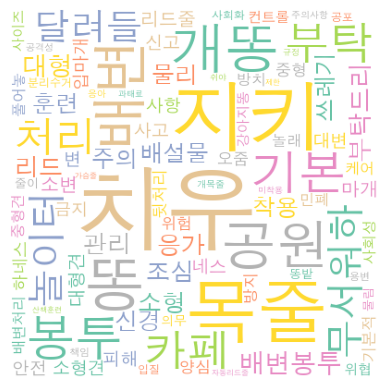

In [23]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

wc=df_word_counts.set_index('keywords').to_dict()["freq"]

wordCloud = WordCloud(
    font_path="AppleGothic", 
    width=400, 
    height=400, 
    max_font_size=100,
    colormap = 'Set2_r',
    background_color="white").generate_from_frequencies(wc)
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')
plt.savefig('/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/wc_강아지산책매너.png',transparent=True)

### 4. 상위 20위 단어 막대그래프 분석

#### 순위 메기기 + 모든 단어 추출을 위한 words -> csv파일로 추출
words의 csv는 첫 한번만 사용하고 이후에 주석 처리

In [24]:
import pandas as pd 
word_index={}
words=pd.DataFrame(columns=["word"])
i=0
for (word, freq) in textDict_sorted:
    if freq > 5 :
        i+=1
        word_index[word] = i
#         words.loc[i]=word
# words.to_csv("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/강아지산책매너_단어.csv")
print(word_index)

{'치우': 1, '지키': 2, '목줄': 3, '똥': 4, '배변': 5, '개똥': 6, '공원': 7, '봉투': 8, '기본': 9, '부탁': 10, '카페': 11, '처리': 12, '무서워하': 13, '놀이터': 14, '달려들': 15, '배변봉투': 16, '대형': 17, '부탁드리': 18, '소형': 19, '리드': 20, '관리': 21, '응가': 22, '조심': 23, '배설물': 24, '훈련': 25, '착용': 26, '신경': 27, '주의': 28, '물리': 29, '쓰레기': 30, '리드줄': 31, '소변': 32, '마개': 33, '대형견': 34, '소형견': 35, '피해': 36, '사항': 37, '사고': 38, '안전': 39, '대변': 40, '네스': 41, '입마개': 42, '신고': 43, '변': 44, '뒷처리': 45, '금지': 46, '하네스': 47, '위험': 48, '중형': 49, '기본적': 50, '방지': 51, '오줌': 52, '양심': 53, '놀래': 54, '사회성': 55, '풀어놓': 56, '방치': 57, '배변처리': 58, '민폐': 59, '케어': 60, '중형견': 61, '컨트롤': 62, '강아지똥': 63, '사이즈': 64, '위협': 65, '의무': 66, '똥밭': 67, '물림': 68, '줄이': 69, '사회화': 70, '입질': 71, '공포': 72, '분리수거': 73, '책임': 74, '용변': 75, '공격성': 76, '주의사항': 77, '응아': 78, '개목줄': 79, '쉬야': 80, '규정': 81, '과태료': 82, '미착용': 83, '산책훈련': 84, '제한': 85, '가슴줄': 86, '자동리드줄': 87}


#### 20위 까지의 단어만 추출

In [25]:
top20=textDict_sorted[0:20]
print(top20)

[('치우', 374), ('지키', 244), ('목줄', 206), ('똥', 145), ('배변', 125), ('개똥', 118), ('공원', 113), ('봉투', 91), ('기본', 87), ('부탁', 78), ('카페', 71), ('처리', 66), ('무서워하', 60), ('놀이터', 60), ('달려들', 57), ('배변봉투', 53), ('대형', 52), ('부탁드리', 47), ('소형', 43), ('리드', 43)]


#### 20위까지의 단어를 DataFrame으로 전환

In [26]:
import pandas as pd

df_top20=pd.DataFrame(columns=['keywords','freq'])

for i in range(0,20):
    df_top20.loc[i]=[top20[i][0],top20[i][1]]

display(df_top20)

,keywords,freq
0,치우,374
1,지키,244
2,목줄,206
3,똥,145
4,배변,125
5,개똥,118
6,공원,113
7,봉투,91
8,기본,87
9,부탁,78


#### 20위까지의 단어로 그린 막대그래프

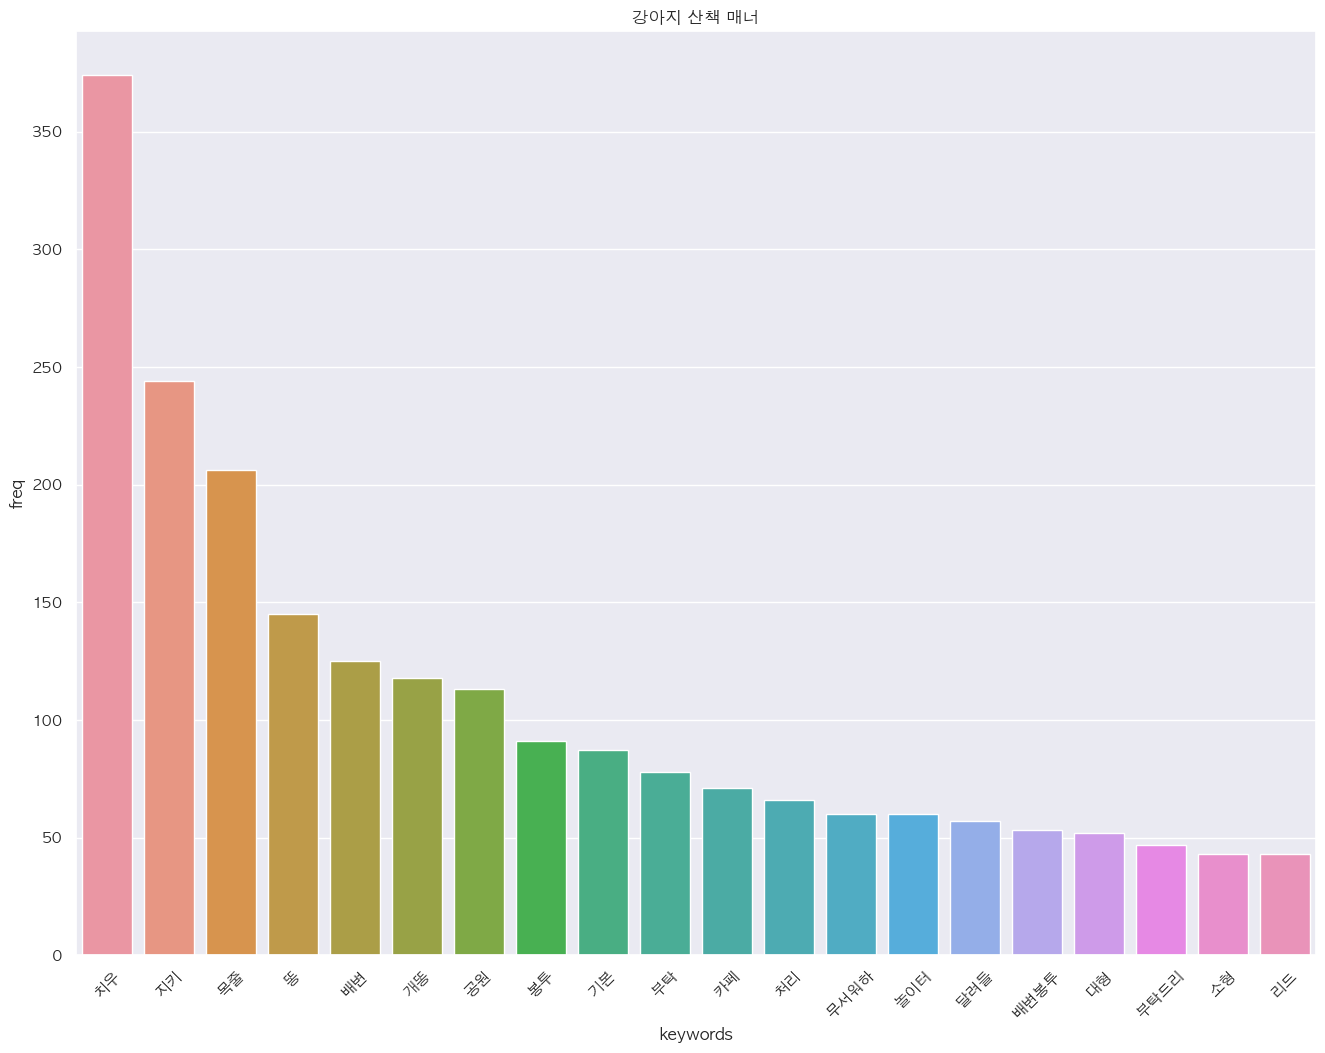

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='darkgrid')

fig = plt.figure(figsize=(16, 12))   
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('강아지 산책 매너')
plt.xticks(rotation=45)
sns.barplot(x='keywords', y='freq', data=df_top20)
#plt.show()
plt.savefig('/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/bar_강아지산책매너.png')

### 5. 연관 카테고리로 퍼센트 구하기

#### 연관 단어 카테고리로 묶기

In [28]:
f3=open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/동의어_강아지산책매너.csv","r")
rea3 = csv.reader(f3)
df = pd.DataFrame(rea3)
synonym = df.set_index(0).T.to_dict('list')
print(synonym)

{'배변 처리': ['치우', '똥', '배변', '개똥', '봉투', '처리', '배변봉투', '응가', '배설물', '소변', '대변', '변', '뒷처리', '오줌', '배변처리', '강아지똥', '똥밭', '용변', '응아', '쉬야'], '산책 용품': ['목줄', '리드', '착용', '리드줄', '마개', '네스', '입마개', '하네스', '줄이', '개목줄', '가슴줄', '자동리드줄', '', '', '', '', '', '', '', ''], '규칙': ['지키', '기본', '신경', '사항', '금지', '기본적', '양심', '의무', '주의사항', '규정', '과태료', '제한', '', '', '', '', '', '', '', ''], '견종 크기': ['대형', '소형', '대형견', '소형견', '중형', '중형견', '사이즈', '', '', '', '', '', '', '', '', '', '', '', '', ''], '부탁': ['부탁', '부탁드리', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], '사고': ['달려들', '무서워하', '물리', '피해', '사고', '신고', '위험', '놀래', '위협', '물림', '입질', '공포', '공격성', '', '', '', '', '', '', ''], '훈련': ['훈련', '사회성', '사회화', '산책훈련', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], '쓰레기': ['쓰레기', '분리수거', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], '관리': ['관리', '조심', '주의', '방지', '케어', '안전', '컨트롤', '책임', '', '', '', '', '', '', '', '', '', '', '', ''], '

#### 카테고리 별 언급 빈도 수 계산

In [29]:
temp_word_counts_dict = {}
exist_item_name_arr = []
for category_key, item_name_arr in synonym.items():

    keyword_total_count = 0
    for item_name in item_name_arr:
        if item_name not in '':
            exist_item_name_arr.append(item_name)

        if item_name not in '' and item_name in word_counts:
            keyword_total_count += word_counts[item_name]

    temp_word_counts_dict[category_key] = keyword_total_count


for word, count in word_counts.items():
    if word not in exist_item_name_arr:
        temp_word_counts_dict[word] = word_counts[word]

print(temp_word_counts_dict)

{'배변 처리': 1261, '산책 용품': 477, '규칙': 511, '견종 크기': 212, '부탁': 125, '사고': 340, '훈련': 74, '쓰레기': 46, '관리': 213, '방치': 60, '공원': 113, '카페': 71, '놀이터': 60}


#### 언급 빈도 순으로 정렬

In [30]:
word_freq_sorted = sorted(temp_word_counts_dict.items(), key=lambda x:x[1], reverse=True)
print(word_freq_sorted)

[('배변 처리', 1261), ('규칙', 511), ('산책 용품', 477), ('사고', 340), ('관리', 213), ('견종 크기', 212), ('부탁', 125), ('공원', 113), ('훈련', 74), ('카페', 71), ('방치', 60), ('놀이터', 60), ('쓰레기', 46)]


#### 카테고리별 언급 빈도 수 DataFrame 전환

In [31]:
import pandas as pd

df_word_freq_sorted=pd.DataFrame(columns=['keywords','freq'])

for i in range(0,13):
    df_word_freq_sorted.loc[i]=[word_freq_sorted[i][0],word_freq_sorted[i][1]]

df_word_freq_sorted.set_index("keywords",inplace=True)
    
display(df_word_freq_sorted)

,freq
keywords,
배변 처리,1261
규칙,511
산책 용품,477
사고,340
관리,213
견종 크기,212
부탁,125
공원,113
훈련,74


#### 카테고리별 언급 빈도 수 파이 그래프 분석

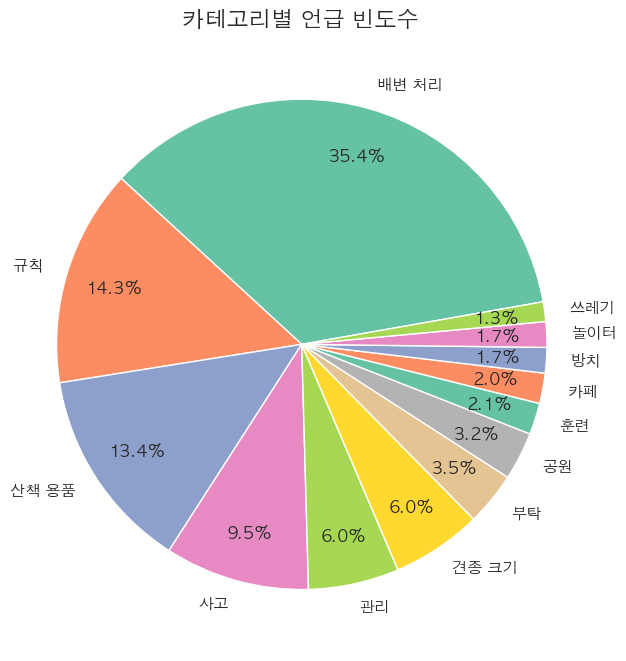

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.set_palette('Set2')

df_word_freq_sorted['freq'].plot(kind='pie', 
                     figsize=(7, 8),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     pctdistance=0.8
                     )

plt.title('카테고리별 언급 빈도수', size=16)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.axis('off')

#plt.show()
plt.savefig('/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/pie_강아지산책매너.png',bbox_inches = 'tight')